## Practical Work 2

For this practical work, the student will have to develop a Python program that is able to implement the gradient descent variants (Batch/Mini-Batch/Stochastic) in order to achieve the linear regression of a set of datapoints.

#### Import numpy, matplotlib.pyplot and make it inline

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score

To have a dataset or set of data points, the student must generate a pair of arrays <b>X</b> and <b>y</b> with the values in <b>X</b> equally distributed between <b>0</b> and <b>20</b> and the values in <b>y</b> such that: 
<b>yi = a*xi + b (and a = -2, b = 1)</b>


In [2]:
a=-2
b=1
x=np.linspace(0,20,50)
# print(len(x) , x)
y=a*x+b

In [3]:
print(y)

[  1.           0.18367347  -0.63265306  -1.44897959  -2.26530612
  -3.08163265  -3.89795918  -4.71428571  -5.53061224  -6.34693878
  -7.16326531  -7.97959184  -8.79591837  -9.6122449  -10.42857143
 -11.24489796 -12.06122449 -12.87755102 -13.69387755 -14.51020408
 -15.32653061 -16.14285714 -16.95918367 -17.7755102  -18.59183673
 -19.40816327 -20.2244898  -21.04081633 -21.85714286 -22.67346939
 -23.48979592 -24.30612245 -25.12244898 -25.93877551 -26.75510204
 -27.57142857 -28.3877551  -29.20408163 -30.02040816 -30.83673469
 -31.65306122 -32.46938776 -33.28571429 -34.10204082 -34.91836735
 -35.73469388 -36.55102041 -37.36734694 -38.18367347 -39.        ]


#### Use your code from practical session 1 and create a function to perform GD for single variable linear regression.
#### The function should take the following input parameters:
##### Input data (X), Target Labels (y), Learning Rate (alpha), Maximum number of iterations
#### The function should return the following:
##### All Theta_0 and Theta_1 values till converge, and equivellant Losses, all hypothesis output, and optimum values of Theta_0 and Theta_1
#### Note: you can choose any suitable stop criteria.

In [4]:
def h(x,o0,o1):         #Hypo
    return o0+o1*x

def j(x,y,o0,o1):       #Cost
    hp=h(x,o0,o1)
    m=len(hp)
    j=((hp-y)**2)/(2)
    return sum((hp-y)**2)/(2*m)

def lin_reg(x,y,theta0,theta1,lr,max_iterations):
    theta0=0
    theta1=0
    j2=10**9
    j1=10**10                       
    n=0
    m=len(x)                        
    it=[]
    jlist=[]
    th0list=[]
    th1list=[]
    epochs=0
    jlist_by_epoch=[]
    while abs(j2-j1)>=0.000001 and epochs<max_iterations:   
        
        for i in range(m):
            
            
            theta0=theta0-lr*(h(x[i],theta0,theta1)-y[i])            #update the value theta0
            theta1=theta1-lr*((h(x[i],theta0,theta1)-y[i])*x[i])   #update the value theta1
            th0list.append(theta0)
            th1list.append(theta1)
            it.append(n)
            jlist.append((h(x[i],theta0,theta1)-y[i])**2)
            n+=1
        epochs+=1
        
        j1=j2
        j2=jlist[-1]
        jlist_by_epoch.append(j2)
        n+=1
        
    return it,jlist,jlist_by_epoch,th0list,th1list,theta0,theta1

#### Try your function with any input parameterss of your choice.

In [5]:
it,jlist,jlist_by_epoch,th0list,th1list,theta0,theta1=lin_reg(x,y,0,0,0.001,1000)

# print(theta0,theta1,th0list[-5:-1],th1list[-5:-1])

#### Calculate r2 score

In [6]:
print("r2 =",r2_score(y,h(x,theta0,theta1)))

r2 = 0.9999352824884127


#### Plot loss vs. epochs

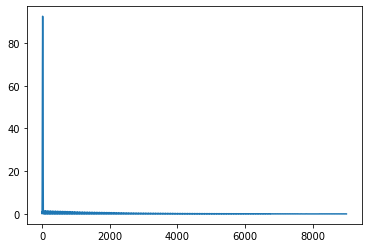

In [7]:
plt.plot(jlist)

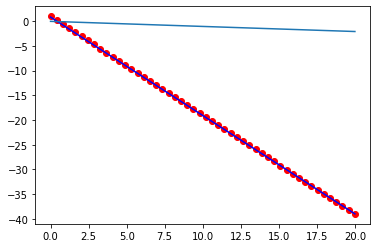

In [8]:
plt.scatter(x,y , c="r");
plt.plot(x,h(x,theta0,theta1), c="b");

plt.plot(x,h(x,th0list[10],th1list[10]))


#### Plot Theta_0 vs. loss and Theta_1 vs. loss

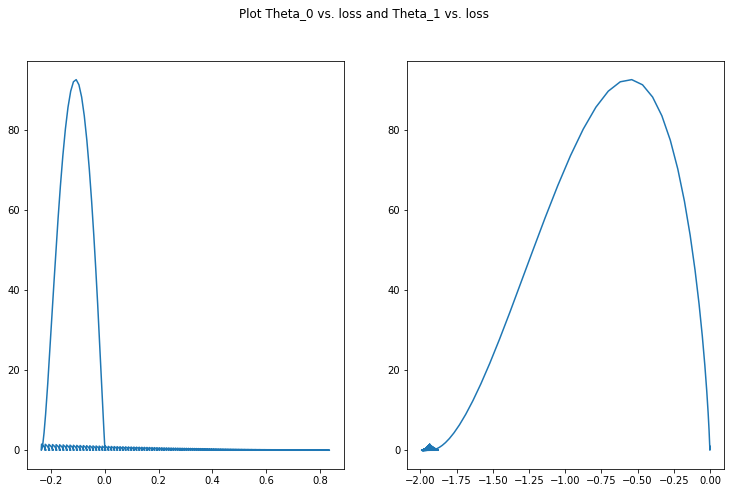

In [9]:
fig, axs = plt.subplots(1,2)
fig.set_size_inches(12.5, 7.5)
fig.suptitle('Plot Theta_0 vs. loss and Theta_1 vs. loss')
axs[0].plot(th0list, jlist)
axs[1].plot(th1list, jlist)
# plt.plot(th0list, jlist)

#### Plot all regression lines till converge

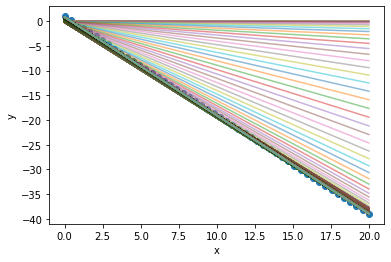

In [10]:
plt.scatter(x,y)
plt.xlabel("x")
plt.ylabel("y")
for i in range(0,len(th0list)):
    plt.plot(x,h(x,th0list[i],th1list[i]) ,alpha=0.5)

#### Plot the best regression line

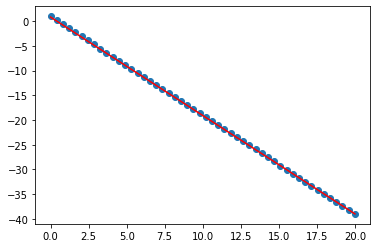

In [11]:
plt.plot(x,h(x,theta0,theta1), c ="r")
plt.scatter(x,y)

#### Try different learning rate and number of iterations then plot loss vs. epochs, loss vs. Theat_0 and Theta_1
#### all regression lines till converge, and the best regression line
#### and see the difference in output.

In [12]:
it,jlist,jlist_by_epoch,th0list,th1list,theta0,theta1=lin_reg(x,y,0,0,0.005,500)

In [13]:
print("r2 =",r2_score(y,h(x,theta0,theta1)))

r2 = 0.9997280299579546


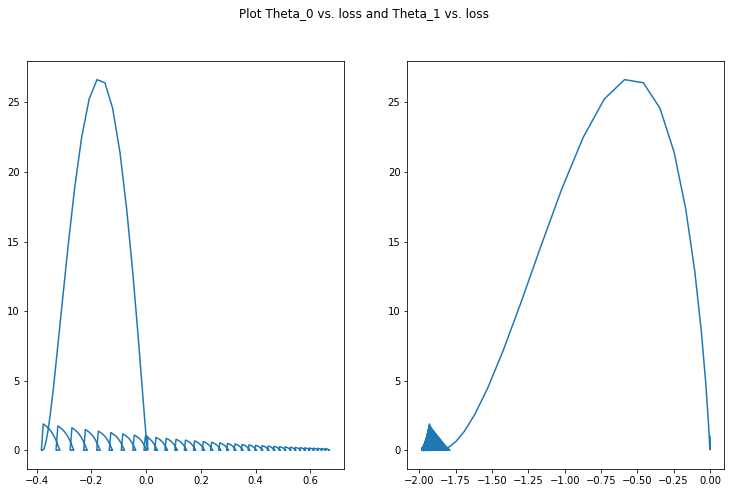

In [14]:
fig, axs = plt.subplots(1,2)
fig.set_size_inches(12.5, 7.5)
fig.suptitle('Plot Theta_0 vs. loss and Theta_1 vs. loss')
axs[0].plot(th0list, jlist)
axs[1].plot(th1list, jlist)
# plt.plot(th0list, jlist)

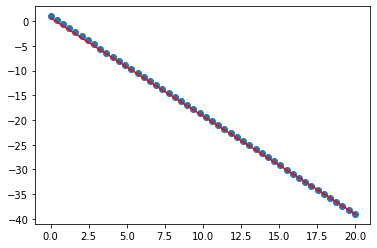

In [15]:
plt.plot(x,h(x,theta0,theta1), c ="r")
plt.scatter(x,y)

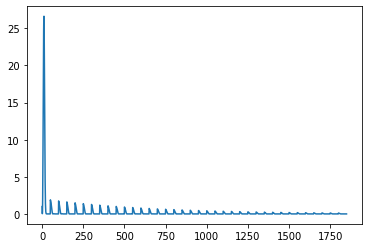

In [16]:
plt.plot(jlist)

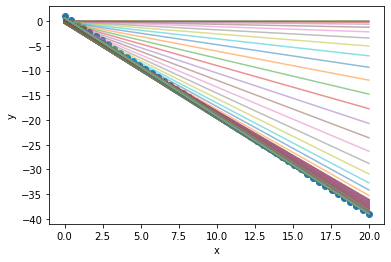

In [17]:
plt.scatter(x,y)
plt.xlabel("x")
plt.ylabel("y")
for i in range(0,len(th0list)):
    plt.plot(x,h(x,th0list[i],th1list[i]) ,alpha=0.5)

#### Update the implementation of the Batch GD to be Mini-Batch and repeat the above plots and evaluations
#### Change batch size and see the effect
### Note: Try once without shuffling the data and once with shuffle and see the effect on the output.

In [18]:
def h(x,th0,th1):
    return th0+th1*x

def j(x,y,th0,th1):                   
    hp=h(x,th0,th1)
    m=len(hp)
    return sum((hp-y)**2)/(2*m)

def lin_reg(x,y,theta0,theta1,lr,max_iterations,batch_size):
    theta0=0
    theta1=0
    j2=10**9
    j1=10**10                       
    n=0
    m=len(x)                        
    it=[]
    jlist=[]
    th0list=[]
    th1list=[]
    epochs=0
    jlist_by_epoch=[]
    while abs(j2-j1)>=0.000001 and epochs<max_iterations:   
        
        for i in range(0,m,batch_size):
            s=i
            d=i+batch_size
            if d>m:
                d=m
            theta0=theta0-lr*(h(x[i],theta0,theta1)-y[i])            #update th0
            theta1=theta1-lr*((h(x[i],theta0,theta1)-y[i])*x[i])     #update th1
            th0list.append(theta0)
            th1list.append(theta1)
            it.append(n)
            jlist.append((h(x[i],theta0,theta1)-y[i])**2)
            n+=1
        epochs+=1
        
        j1=j2
        j2=jlist[-1]
        jlist_by_epoch.append(j2)
        n+=1
        
    return it,jlist,jlist_by_epoch,th0list,th1list,theta0,theta1



In [19]:
it,jlist,jlist_by_epoch,th0list,th1list,theta0,theta1=lin_reg(x,y,0,0,0.001,1000,20)

In [20]:
print("r2 =",r2_score(y,h(x,theta0,theta1)))

r2 = 0.9997811544462767


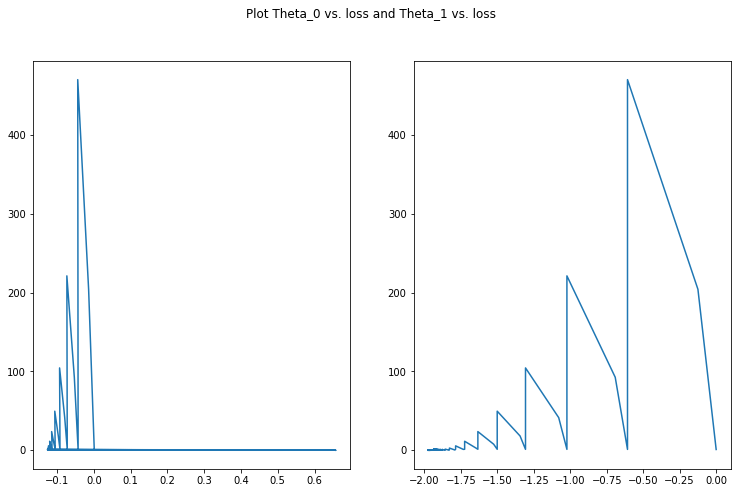

In [21]:
fig, axs = plt.subplots(1,2)
fig.set_size_inches(12.5, 7.5)
fig.suptitle('Plot Theta_0 vs. loss and Theta_1 vs. loss')
axs[0].plot(th0list, jlist)
axs[1].plot(th1list, jlist)
# plt.plot(th0list, jlist)

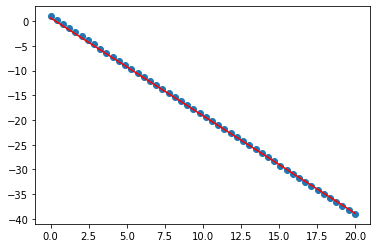

In [22]:
plt.plot(x,h(x,theta0,theta1), c ="r")
plt.scatter(x,y)

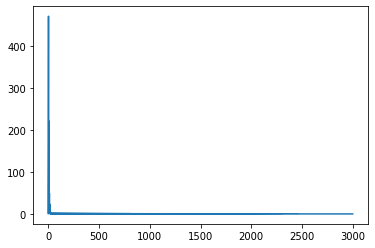

In [23]:
plt.plot(jlist)

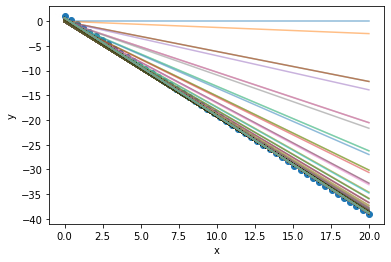

In [24]:
plt.scatter(x,y)
plt.xlabel("x")
plt.ylabel("y")
for i in range(0,len(th0list)):
    plt.plot(x,h(x,th0list[i],th1list[i]) ,alpha=0.5)

## Stochastic GD

#### Update the implementation of the Batch GD to beStochastic and rpeat the above plots and evaluations
#### You can try different learning rate and see its effect.
#### Compare to Batch and Mini-Batch GD
### Note: Try once without shuffling the data and once with shuffle and see the effect on the output.

In [25]:
def h(x,th0,th1):                     #predicted values function
    return th0+th1*x

def j(x,y,th0,th1):                   #cost function
    m=len(h(x,th0,th1))
    return sum((h(x,th0,th1)-y)**2)/(2)

def lin_reg(x,y,theta0,theta1,lr,max_iterations):
    theta0=0
    theta1=0
    j2=10**9
    j1=10**10                       #i used j1 and j2 in the condition of the loop
    n=0
    m=len(x)                        #number of data points
    it=[]
    jlist=[]
    th0list=[]
    th1list=[]
    epochs=0
    jlist_by_epoch=[]
    while abs(j2-j1)>=0.000001 and epochs<max_iterations:   #the loop will terminate when the value of j starts to get constant
        
        for i in range(m):
            
            
            theta0=theta0-lr*(h(x[i],theta0,theta1)-y[i])            #update the value theta0
            theta1=theta1-lr*((h(x[i],theta0,theta1)-y[i])*x[i])   #update the value theta0
            th0list.append(theta0)
            th1list.append(theta1)
            it.append(n)
            jlist.append((h(x[i],theta0,theta1)-y[i])**2)
            n+=1
        epochs+=1
        
        j1=j2
        j2=jlist[-1]
        jlist_by_epoch.append(j2)
        n+=1
        
    return it,jlist,jlist_by_epoch,th0list,th1list,theta0,theta1



In [26]:
it,jlist,jlist_by_epoch,th0list,th1list,theta0,theta1=lin_reg(x,y,0,0,0.001,1000)

In [27]:
print("r2 =",r2_score(y,h(x,theta0,theta1)))

r2 = 0.9999352824884127


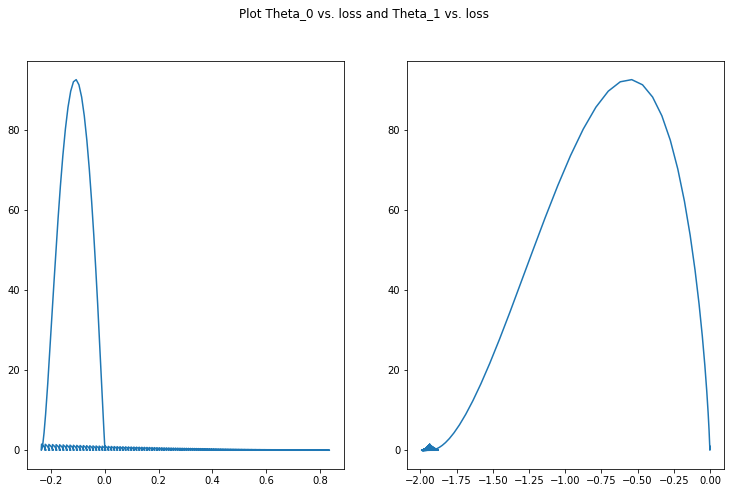

In [28]:
fig, axs = plt.subplots(1,2)
fig.set_size_inches(12.5, 7.5)
fig.suptitle('Plot Theta_0 vs. loss and Theta_1 vs. loss')
axs[0].plot(th0list, jlist)
axs[1].plot(th1list, jlist)
# plt.plot(th0list, jlist)

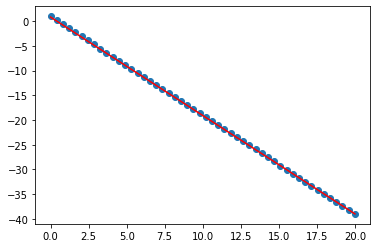

In [29]:
plt.plot(x,h(x,theta0,theta1), c ="r")
plt.scatter(x,y)

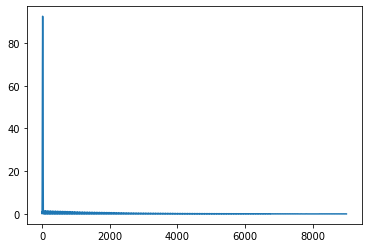

In [30]:
plt.plot(jlist)

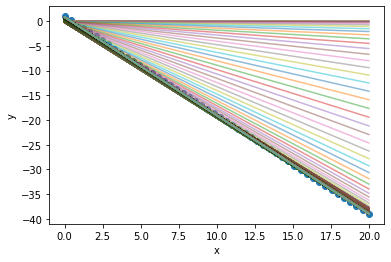

In [31]:
plt.scatter(x,y)
plt.xlabel("x")
plt.ylabel("y")
for i in range(0,len(th0list)):
    plt.plot(x,h(x,th0list[i],th1list[i]) ,alpha=0.5)